##Instalação e Carregamento de Pacotes

In [77]:
install.packages("readxl")
install.packages("dplyr")
install.packages("xtable")

library(readxl)
library(dplyr)     # Manipulação de dados


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##Leitura da Base de Dados

In [78]:
dados <- read_excel("/content/Base2025.1.xlsx")
head(dados)


Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Forquilha,AIS 14,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 00:20:00,Quarta,Arma de fogo,Masculino,32,Alfabetizado,Não Informada
Fortaleza,AIS 06,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 01:59:59,Quarta,Arma de fogo,Feminino,27,Ensino Fundamental Completo,Parda
Santa Quitéria,AIS 16,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 02:12:19,Quarta,Arma de fogo,Masculino,17,Ensino Fundamental Completo,Não Informada
Fortaleza,AIS 02,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 04:30:00,Quarta,Arma branca,Feminino,18,Ensino Fundamental Completo,Parda
Mauriti,AIS 19,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 04:59:59,Quarta,Arma branca,Masculino,23,Ensino Fundamental Incompleto,Não Informada
Fortaleza,AIS 06,HOMICIDIO DOLOSO,2020-01-01,1899-12-31 04:59:59,Quarta,Outros meios,Masculino,19,Ensino Fundamental Incompleto,Branca


➢ Fazer uma tabela com as frequências simples e relativas para as Variáveis:

• Natureza

• Meio Empregado

• Gênero

• Escolaridade da Vítima

• Raça da Vítima

• Dia da Semana


##Tabelas de Frequências Simples e Relativas

In [79]:
frequency_table <- function (data, column_name = 'Categoria') {
  # Criar tabela de frequências simples
  table_data <- table(data)
  # Calcular proporções relativas
  prop_table = prop.table(table_data)

  # Criar data frame com resultados
  frequency_frame = data.frame(
    categoria = names(table_data),
    freq_simples = as.numeric(table_data),
    freq_rel_percent = as.numeric(round(prop_table * 100, 2))
  )
  # Renomear a primeira coluna
  names(frequency_frame)[1] <- column_name

  return(frequency_frame)
}

###Natureza

In [80]:
dist_freq_natureza <- frequency_table(dados$Natureza, 'Natureza')
dist_freq_natureza

Natureza,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
FEMINICÍDIO,170,1.03
HOMICIDIO DOLOSO,16088,97.21
LESAO CORPORAL SEGUIDA DE MORTE,92,0.56
ROUBO SEGUIDO DE MORTE (LATROCINIO),200,1.21


###Meio Empregado

In [81]:
dist_freq_meio_empregado <- frequency_table(dados$`Meio Empregado`, 'Meio Empregado')
dist_freq_meio_empregado

Meio Empregado,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
Arma branca,1385,8.37
Arma de fogo,14223,85.94
Outros meios,942,5.69


###Gênero

In [82]:
dist_freq_genero <- frequency_table(dados$`Gênero`, "Gênero")
dist_freq_genero

Gênero,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
Feminino,1528,9.23
Masculino,15022,90.77


###Escolaridade da Vítima

In [83]:
dist_freq_genero <- frequency_table(dados$`Escolaridade da Vítima`, "Escolaridade da Vítima")
dist_freq_genero

Escolaridade da Vítima,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
Alfabetizado,5451,32.94
Ensino Fundamental Completo,2046,12.36
Ensino Fundamental Incompleto,3330,20.12
Ensino Médio Completo,1710,10.33
Ensino Médio Incompleto,1154,6.97
Não Alfabetizado,673,4.07
Não Informada,1968,11.89
Superior Completo,123,0.74
Superior Incompleto,95,0.57


###Raça da Vítima

In [84]:
dist_freq_genero <- frequency_table(dados$`Raça da Vítima`, "Raça da Vítima")
dist_freq_genero

Raça da Vítima,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
Amarela,11,0.07
Branca,623,3.76
Indígena,16,0.10
Não Informada,11558,69.84
Parda,4083,24.67
Preta,259,1.56


###Dia da Semana

In [85]:
dist_freq_genero <- frequency_table(dados$`Dia da Semana`, "Dia da Semana")
dist_freq_genero

Dia da Semana,freq_simples,freq_rel_percent
<chr>,<dbl>,<dbl>
Domingo,2898,17.51
Quarta,2170,13.11
Quinta,2132,12.88
Sábado,2835,17.13
Segunda,2168,13.10
Sexta,2297,13.88
Terça,2050,12.39


##Tabelas Cruzadas

###Meio Empregado x Gênero

In [86]:
dist_freq_cruzada <- cbind(freq_simples = table(dados$`Meio Empregado`,dados$`Gênero`),
                          freq_rel = round(prop.table(table(dados$`Meio Empregado`,dados$`Gênero`)),2),
                          freq_rel_percent=round(prop.table(table(dados$`Meio Empregado`,dados$`Gênero`))*100,2)
                          )

colnames(dist_freq_cruzada) <- c(
  'Freq.Simples(Fem)', 'Freq.Simples(Masc)',
  'Freq.Relativa(Fem)', 'Freq.Relativa(Masc)',
  'Freq.Percentual(Fem)', 'Freq.Percentual(Masc)'
)

data.frame(dist_freq_cruzada)

,Freq.Simples.Fem.,Freq.Simples.Masc.,Freq.Relativa.Fem.,Freq.Relativa.Masc.,Freq.Percentual.Fem.,Freq.Percentual.Masc.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arma branca,233,1152,0.01,0.07,1.41,6.96
Arma de fogo,1167,13056,0.07,0.79,7.05,78.89
Outros meios,128,814,0.01,0.05,0.77,4.92


###Escolaridade da Vítima x Raça da Vítima

In [87]:
dist_freq_cruzada2 <- cbind(freq_simples = table(dados$`Escolaridade da Vítima`,dados$`Raça da Vítima`),
                          freq_rel = round(prop.table(table(dados$`Escolaridade da Vítima`,dados$`Raça da Vítima`)),2),
                          freq_rel_percent=round(prop.table(table(dados$`Escolaridade da Vítima`,dados$`Raça da Vítima`))*100,2)
                          )

colnames(dist_freq_cruzada2) <- c(
  'Freq.Simples(Amarela)', 'Freq.Simples(Branca)','Freq.Simples(Indígena)', 'Freq.Simples(Não informado)','Freq.Simples(Parda)', 'Freq.Simples(Preta)',
  'Freq.Relativa(Amarela)', 'Freq.Relativa(Branca)','Freq.Relativa(Indígena)', 'Freq.Relativa(Não informado)','Freq.Relativa(Parda)', 'Freq.Relativa(Preta)',
  'Freq.Percentual(Amarela)', 'Freq.Percentual(Branca)','Freq.Percentual(Indígena)', 'Freq.Percentual(Não informado)','Freq.Percentual(Parda)', 'Freq.Percentual(Preta)'
)

frame_freq_cruzada2 <- data.frame(dist_freq_cruzada2)
frame_freq_cruzada2

,Freq.Simples.Amarela.,Freq.Simples.Branca.,Freq.Simples.Indígena.,Freq.Simples.Não.informado.,Freq.Simples.Parda.,Freq.Simples.Preta.,Freq.Relativa.Amarela.,Freq.Relativa.Branca.,Freq.Relativa.Indígena.,Freq.Relativa.Não.informado.,Freq.Relativa.Parda.,Freq.Relativa.Preta.,Freq.Percentual.Amarela.,Freq.Percentual.Branca.,Freq.Percentual.Indígena.,Freq.Percentual.Não.informado.,Freq.Percentual.Parda.,Freq.Percentual.Preta.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alfabetizado,4,197,4,3799,1350,97,0,0.01,0,0.23,0.08,0.01,0.02,1.19,0.02,22.95,8.16,0.59
Ensino Fundamental Completo,2,76,2,1358,582,26,0,0.00,0,0.08,0.04,0.00,0.01,0.46,0.01,8.21,3.52,0.16
Ensino Fundamental Incompleto,1,134,7,2164,959,65,0,0.01,0,0.13,0.06,0.00,0.01,0.81,0.04,13.08,5.79,0.39
Ensino Médio Completo,1,102,0,1132,455,20,0,0.01,0,0.07,0.03,0.00,0.01,0.62,0.00,6.84,2.75,0.12
Ensino Médio Incompleto,3,52,0,782,299,18,0,0.00,0,0.05,0.02,0.00,0.02,0.31,0.00,4.73,1.81,0.11
Não Alfabetizado,0,12,1,478,166,16,0,0.00,0,0.03,0.01,0.00,0.00,0.07,0.01,2.89,1.00,0.10
Não Informada,0,39,0,1687,226,16,0,0.00,0,0.10,0.01,0.00,0.00,0.24,0.00,10.19,1.37,0.10
Superior Completo,0,9,2,85,26,1,0,0.00,0,0.01,0.00,0.00,0.00,0.05,0.01,0.51,0.16,0.01
Superior Incompleto,0,2,0,73,20,0,0,0.00,0,0.00,0.00,0.00,0.00,0.01,0.00,0.44,0.12,0.00


##Gráficos

###Gráficos de Setor (Pizza)

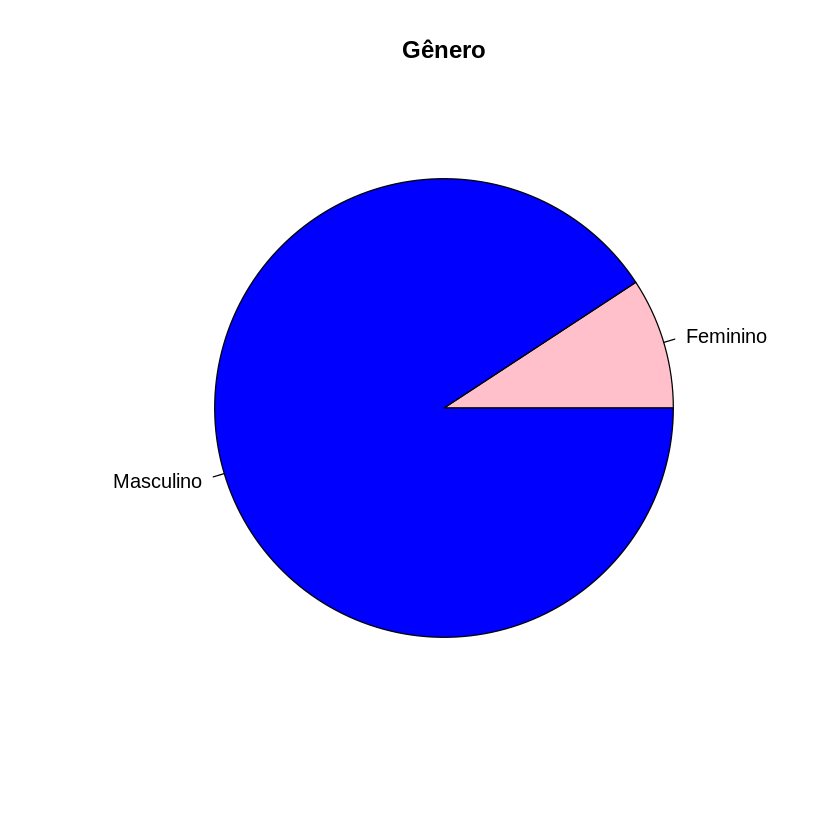

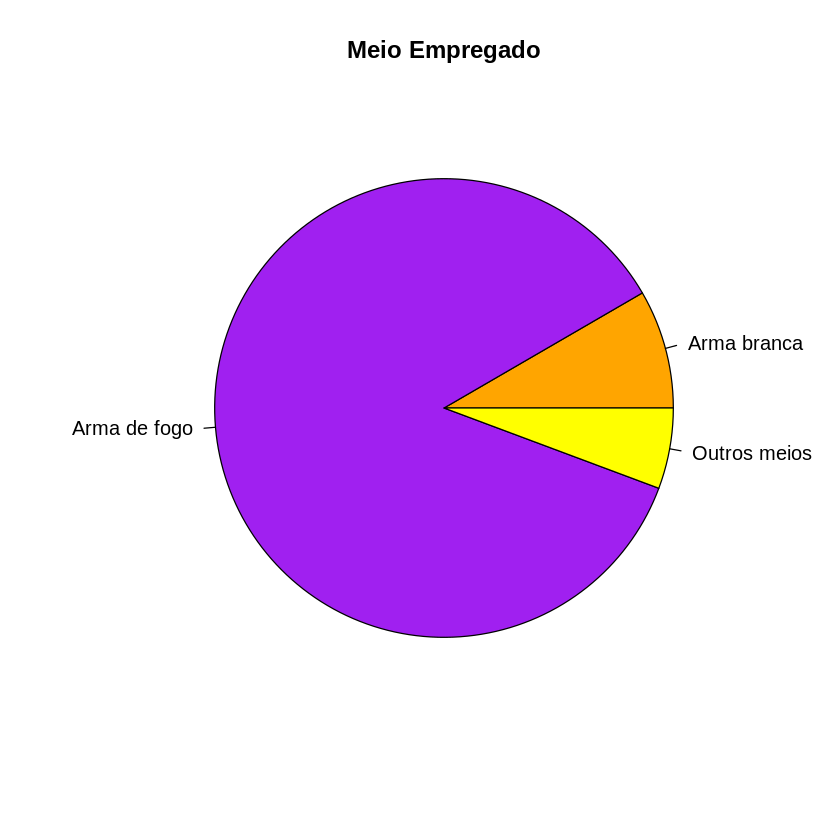

In [88]:
pie(table(dados$`Gênero`), main = "Gênero", col = c("pink", "blue"))
pie(table(dados$`Meio Empregado`), main = "Meio Empregado", col = c("orange", "purple", "yellow"))


###Gráficos de Barra

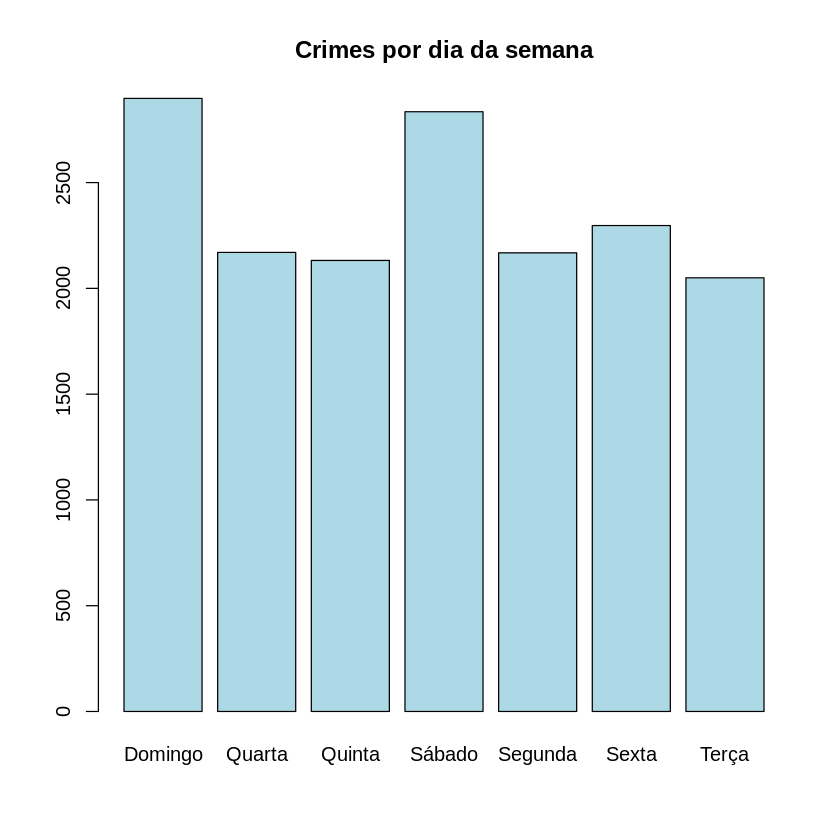

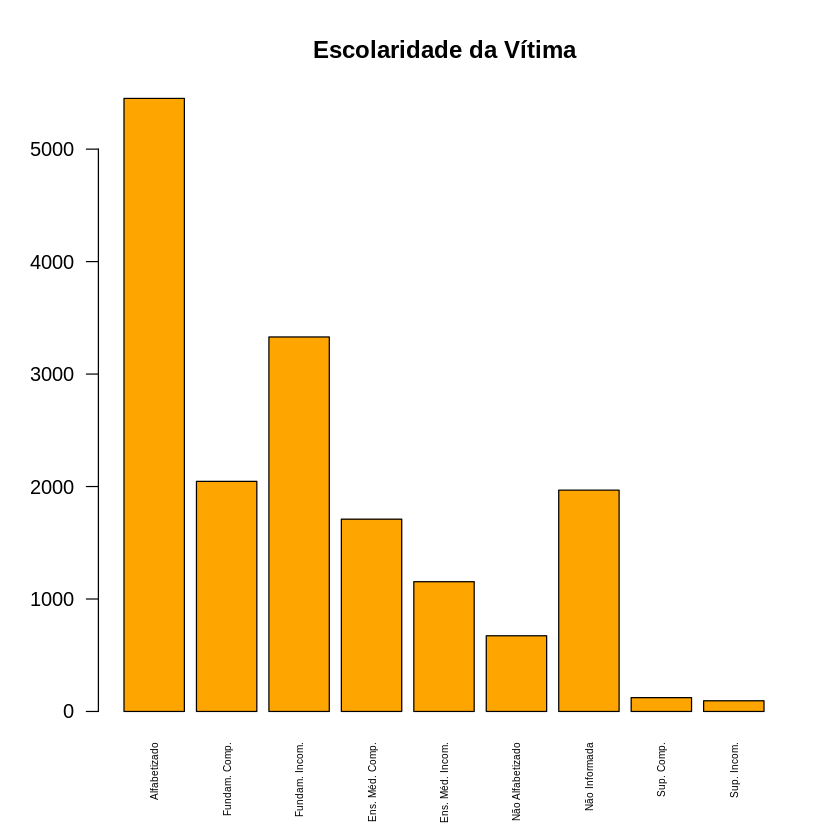

In [89]:
barplot(table(dados$`Dia da Semana`), main="Crimes por dia da semana", col="lightblue")

escolaridade <- table(dados$`Escolaridade da Vítima`)
escolaridade_names = c("Alfabetizado", "Fundam. Comp.", "Fundam. Incom.", "Ens. Méd. Comp.",
                       "Ens. Méd. Incom.", "Não Alfabetizado", "Não Informada", "Sup. Comp.", "Sup. Incom.")

barplot(escolaridade, main="Escolaridade da Vítima", names.arg=escolaridade_names,
        las=2, cex.names=0.5, col = "orange")


Gráficos de Linha

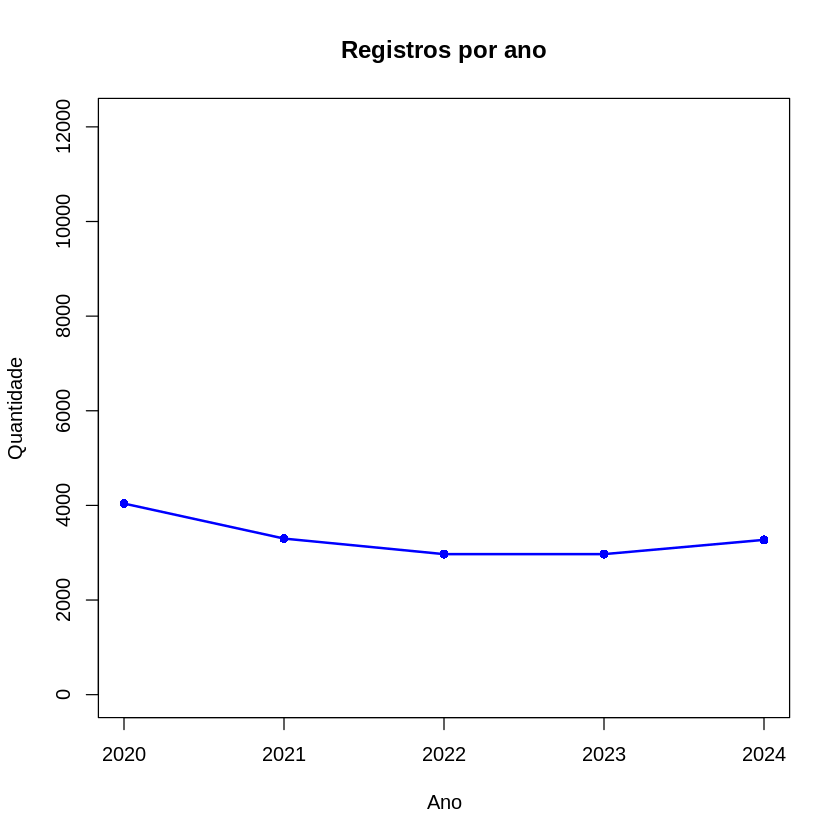

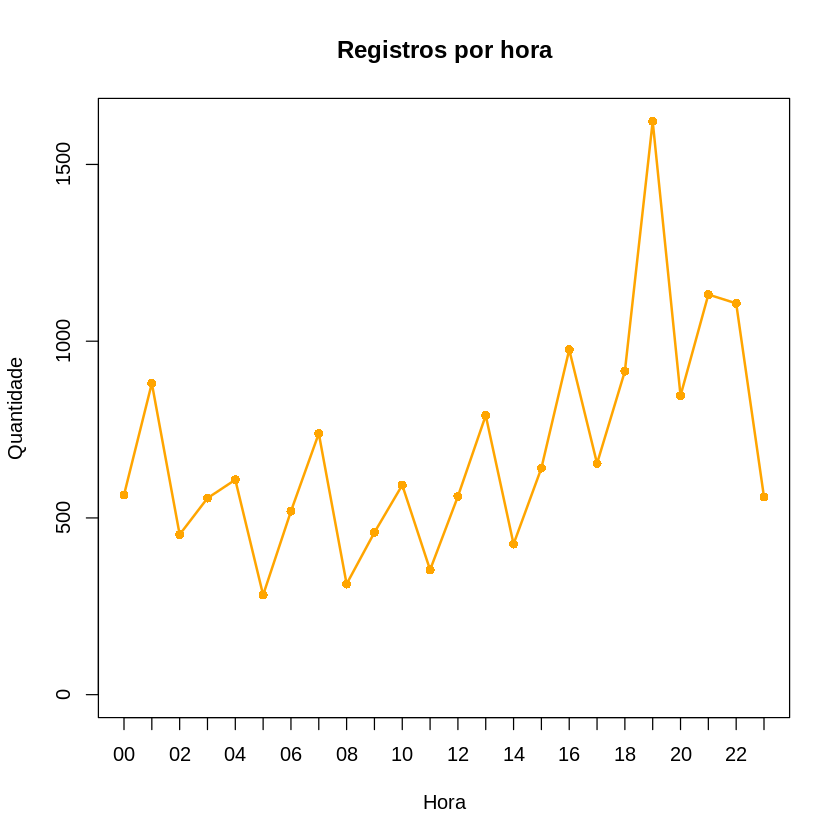

In [90]:
date_column <- table(format(dados$Data, "%Y"))
plot(date_column, type="o", col="blue", pch=16, lwd=2,
     main="Registros por ano", xlab="Ano", ylab="Quantidade",
     ylim=c(0, max(date_column) * 3))

hour_column <- table(format(dados$Hora, "%H"))
plot(hour_column, type="o", col="orange", pch=16, lwd=2,
     main="Registros por hora", xlab="Hora", ylab="Quantidade")


##Boxplot

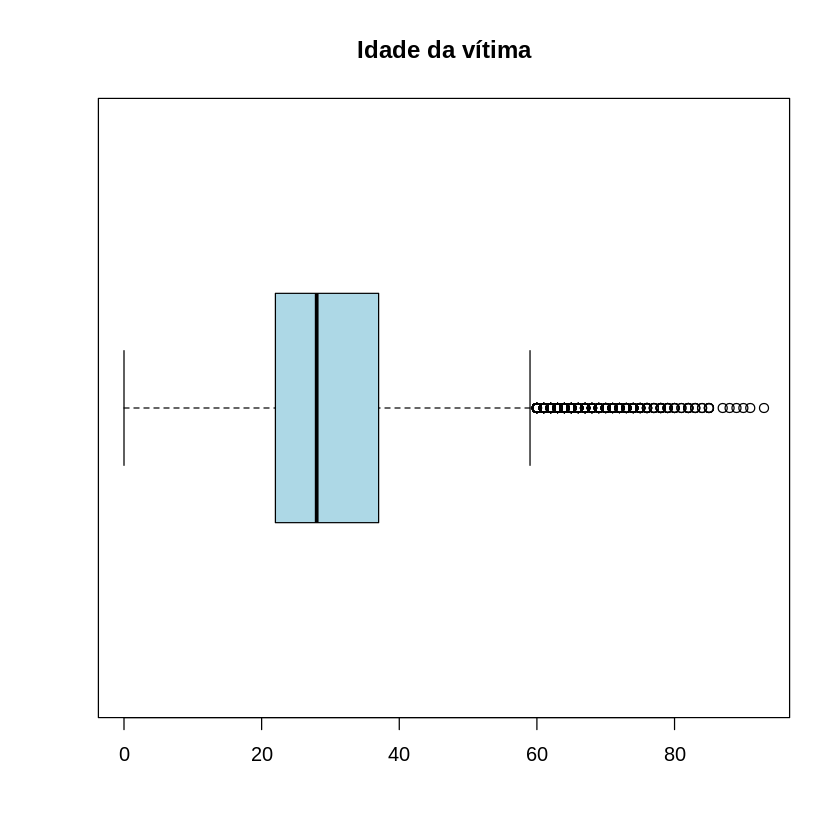

In [91]:
boxplot(idade_vitima, main="Idade da vítima", col="lightblue",
        border="black", horizontal=TRUE)


##Medidas de Posição e Separatrizes

In [92]:
filter_idade <- dados %>% filter(dados$`Idade da Vítima` != 'Não Informada')
idade_vitima <- as.numeric(filter_idade$`Idade da Vítima`)

# Moda
getmode <- function(x) {
  uniq <- unique(x)
  uniq[which.max(tabulate(match(x, uniq)))]
}

media <- round(mean(idade_vitima), 2)
mediana <- median(idade_vitima)
moda <- getmode(idade_vitima)
quartis <- quantile(idade_vitima, probs = c(0.25, 0.5, 0.75))

cat("Medidas de Posição - Idade da Vítima\n")
cat(strrep("=", 30), "\n")
cat("Moda: ", moda, "\n")
cat("Média: ", media, "\n")
cat("Mediana: ", mediana, "\n")
cat("1º Quartil (Q1): ", quartis[1], "\n")
cat("2º Quartil (Q2 - Mediana): ", quartis[2], "\n")
cat("3º Quartil (Q3): ", quartis[3], "\n")



Medidas de Posição - Idade da Vítima
Moda:  24 
Média:  30.63 
Mediana:  28 
1º Quartil (Q1):  22 
2º Quartil (Q2 - Mediana):  28 
3º Quartil (Q3):  37 


##Medidas de Dispersão

In [93]:
variancia <- round(var(idade_vitima), 2)
desvio_padrao <- round(sd(idade_vitima), 2)
amplitude <- max(idade_vitima) - min(idade_vitima)

cat("Medidas de Dispersão - Idade da Vítima\n")
cat(strrep("=", 30), "\n")
cat("Variância: ", variancia, "\n")
cat("Desvio Padrão: ", desvio_padrao, "\n")
cat("Amplitude: ", amplitude, "\n")


Medidas de Dispersão - Idade da Vítima
Variância:  140.5 
Desvio Padrão:  11.85 
Amplitude:  93 
